In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [4]:
df = spark.read.csv('iris.CSV', inferSchema= True, header= True)
df.show()

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|
|         5.0|        3.4|         1.5|        0.2| Setosa|          0|
|         4.4|        2.9|         1.4|        0.2| Setosa|          0|
|         4.9|        3.1|         1.5|        0.1| Setosa|          0|
|         5.4|        3.7|         1.5|        0.2| Setosa|     

In [12]:
#Этап 3 min, max, avg
#df.createOrReplaceTempView('flowers')
#df_max = spark.sql('SELECT max(sepal_length),max(sepal_width), max(petal_length), max(petal_width) from flowers group by variety')
df_max= df.groupBy('Variety').max('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   Variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [14]:
df_min= df.groupBy('Variety').min('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   Variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [19]:
df_avg= df.groupBy('Variety').avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
df_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   Variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



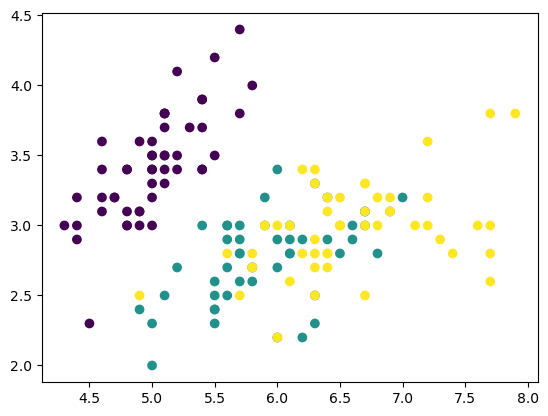

In [21]:
#Этап 4 график 
#sepal
import matplotlib.pyplot as plt
plt.scatter(df[['sepal_length']].collect(), df[['sepal_width']].collect(), c=df[['variety_num']].collect())

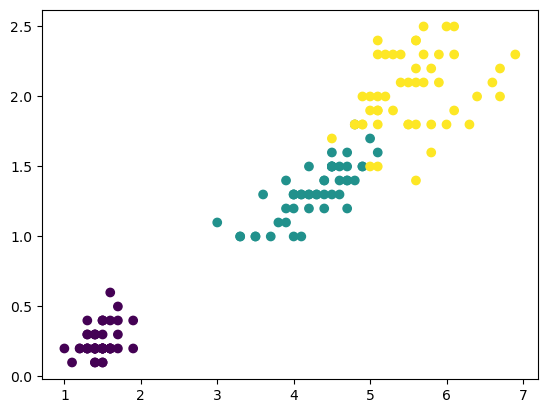

In [35]:
#petal
plt.scatter(df[['petal_length']].collect(), df[['petal_width']].collect(), c=df[['variety_num']].collect())


Этап 5
Изучите получившийся график и сформулируйте правило вида:
- ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ ЕГО, НАПРИМЕР, UNKNOWN)
- При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с ранее сформулированным предсказанием
- Убедитесь, что результат выполнения команды совпадает с предложенным ответом"""

In [38]:
from pyspark.sql.functions import when
df_res = df.withColumn('prediction',when(df['petal_width']<1, 'Setosa').otherwise('Unknown'))
df_res.show()

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|    Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|    Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|          0|    Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|          0|    Setosa|
|   

Этап 6
Проверьте качество своего предсказания.
Для этого:

- При помощи фильтрации датасета по команде df.where((условие 1) & (условие 2)) подсчитайте количество строк, где Вы предсказали класс Setosa и правильная метка также равна Setosa
- При помощи оператора “не равно” - != подсчитайте количество строк, где Вы предсказали класс Setosa, а правильный класс был какой-то другой
- Убедитесь, что результат выполнения команды совпадает с предложенным ответом

In [47]:
match = df_res.where((df_res['variety'] == 'Setosa') & (df_res['prediction'] == 'Setosa')).count()
match

50

In [48]:
unmatch = df_res.where((df_res['variety'] == 'setosa') & (df_res['prediction'] != 'Setosa')).count()
unmatch

0